# Machine Learning Engineer Nanodegree
## Capstone
## Project: Capstone: Creating a custom RL algorithm



>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Introduction
Markov Decision Problems (MDP) are useful for a wide variety of problems but it has a key weakness. It assumes perfect sense of all relevant information to the problem. This limits the range of problems it can solve optimally to those that are in controlled and simplified environments so as to make it easier to add sensors.

Partially Observable MDP’s (POMDP) lack this weakness. Broadening the range of problems an agent can solve at the cost of being more intractable to solve. Recently Cooperative Inverse reinforcement Learning, a useful set of problems that are relevant to value alignment as it can be used to analyze the incentives of human machine interaction, were shown to be reducible from a Multi-Agent MDP (MMDP) to a POMDP  with a single agent.[1] Value Alignment is probably one of the most import problems to solve in AI because even if we get everything else right, if we don’t get Value Alignment right then it won’t work out. I think it's reasonable to suspect that a superhuman AI will resist any change to it's utility function and if that's the case then as Norbert Weiner (1960) wrote “If we use, to achieve our purposes, a mechanical agency with whose operation we cannot interfere effectively . . . we had better be quite sure that the purpose put into the machine is the purpose which we really desire.” The Value alignment problem is the problem of how to create a reward or utility function that benefits humans and where taking it to it’s logical end game doesn’t cause the universe to turn into paper-clips or something else that humans deem low in value if it were plugged into a superhuman AI.


## Problem Statement
The problem class I set out to solve is a POMDP. A POMDP is an environment of states, Transitions between States given an action and the last state and a set of observations available to the agent. A POMDP is reducible to a Continuous Markov Decision Process (The Belief Space) Making it solvable by the Witness Algorithm[2][3][4]. I wanted to try my hand reducing the problem even further. I came up with a simple way of approximating a solution to a POMDP by arbitrarily splitting vast regions in belief space into discrete segments. This turns it into a MDP that can be solved with a q-learning algorithm. I couldn’t find a paper on it but the approach is so simple that I would be surprised if no one else had tried it before. Otherwise my key insight here is that a POMDP introduces the question “Which questions are the most relevant to solving a given problem?” Success of this approach can be measured by average reward per trial. There is a possibility that it may never find reach the goal state. For this situation I have added a time limit. If time runs out I end the simulation and it counts as a failure.

## Data sets and input

I constructed two partially observable environments. The environments will feed sense data and a reward into the agent. The first environment is the simple tiger problem. The agent is between two doors. Behind one of them is a tiger. The agent can’t sense the tiger directly making this a partially observable environment. The agent wants to get away from the tiger by opening the door with no tiger. If the agent opens the door with the tiger the tiger will maul the agent. There are 3 actions the agent can take. She can listen for the tiger but the sound of the tiger is scary and she wouldn’t want to do it too much. She can open the door on her right or she can open the door on her left. I also added a hallway.

The second environment has four states. It is a 4x1 grid. Cell (0,3) is the goal state. Each cell has a color. If the agent is in the goal state they will observe green. Everywhere else she will observe blue. The agent can move left or right. If the agent moves left in the left most cell they will not move. If they move right in the rightmost cell they will not move. If the agent moves left or right in the goal state they will be teleported to a random blue state with no bias in probability.(about 1/3 chance for each blue chance)


## Solution Statement
The Agent will have a model of the environment represented as an array of probabilities with the same size as the amount of States and where the sum of each element in the array equals 1. The agent will update the array whenever it receives new observations from the environment. The transition function would have to be known to the agent as well in order to update the belief co-MDP

The array of probabilities will be used to construct all states for the MDP by splitting it into discrete regions of arbitrary size. (these regions lie along the same hyperplane. [The hyperplane has as many dimensions as states]) The belief is a point in this hyperplane. When the belief enters one of these regions it is said to transition to that particular region.

For some resolution, and some amount of states in a POMPD, The amount of regions will be equal to the resolution to the power of the amount of states - 1. So if the resolution is 3 and the amount of states is 2 there will be 3^2-1 = 3 regions. If the resolution is 3 and the amount of possible states is 4 then there is 3^4-1 = 27 regions. 

I'm projecting the high dimentional space onto a two dimensional regular polygon so it is easier to visualize and debug. A visualization of this polygon and which belief state is displayed when the sim is running.

-----

## Benchmark Model


A q-learner is then thrown at this MDP to solve it to the best of its ability.

I will then contrast this with the benchmark of just throwing a q-learning algorithm directly on the POMDP.

I will barrow the reliability metric from the smart car project to gauge it's success. I will then compare the vanilla q-learning algorithm against the updated algorithm to see how they both perform on the same metric.


 **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Reliability 	|
|:-----:	|:-----------:	|
|   A+      | Agent Solves the POMDP<br />for 100% of trips. |
|   A       | Agent Solves the POMDP<br />for at least 90% of trips. |
|   B   	| Agent Solves the POMDP<br />for at least 80% of trips. |
|   C   	| Agent Solves the POMDP<br />for at least 70% of trips. |
|   D   	| Agent Solves the POMDP<br />for at least 60% of trips. |
|   F   	| Agent fails to solve the POMDP on time<br />for at least 60% of trips. |



In [46]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks"
%matplotlib inline

### Basic POMDPAgent 4x1Simulation Results with no learning

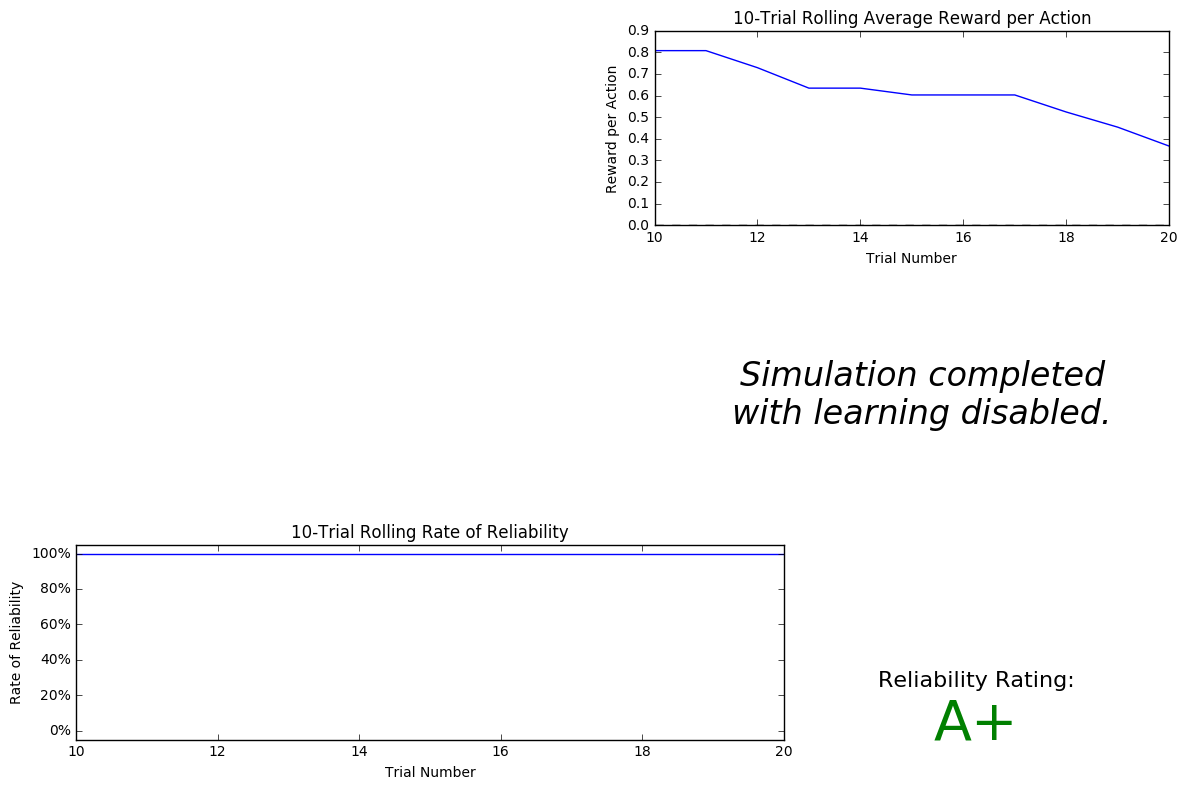

In [47]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

## Basic q-learning agent 4x1Simulation with no learning

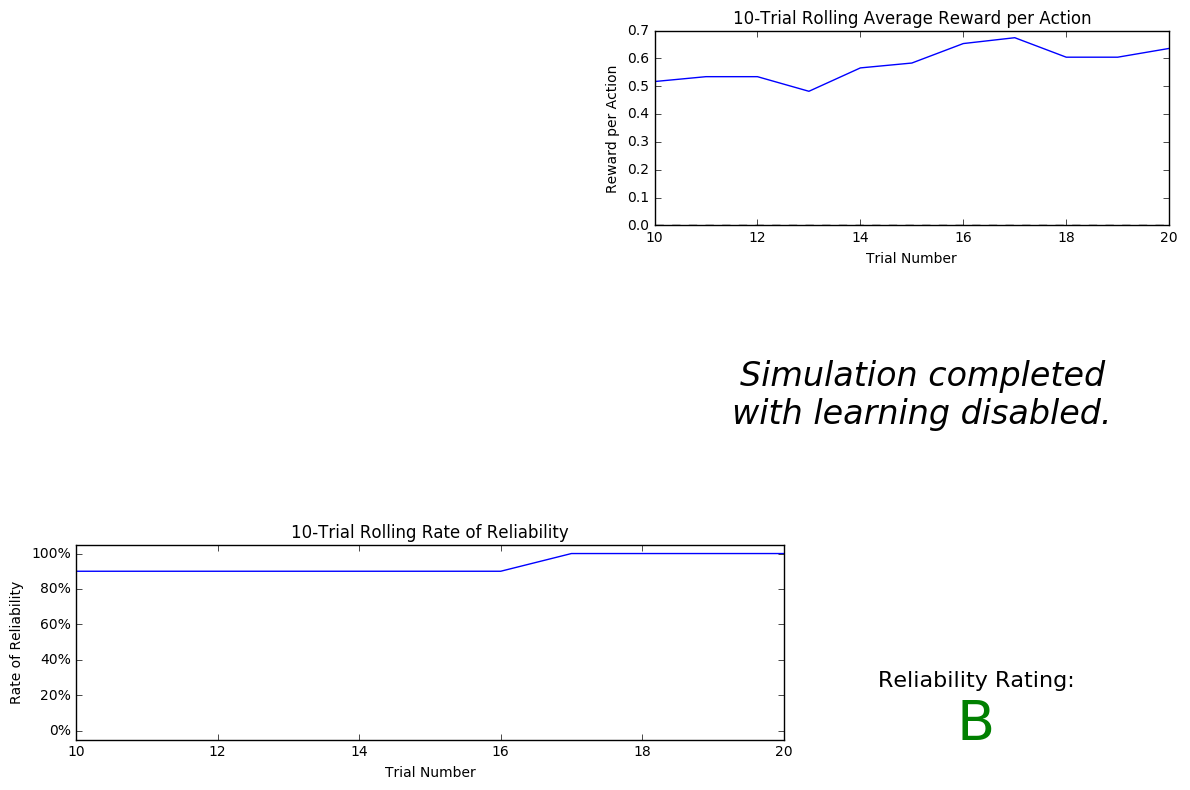

In [48]:
# Load the 'qsim_no-learning' file from the default Q-Learning simulation
vs.plot_trials('qsim_no-learning.csv')

## Analysis
So it looks like the number of states is so small that moving randomly is a valid strategy.

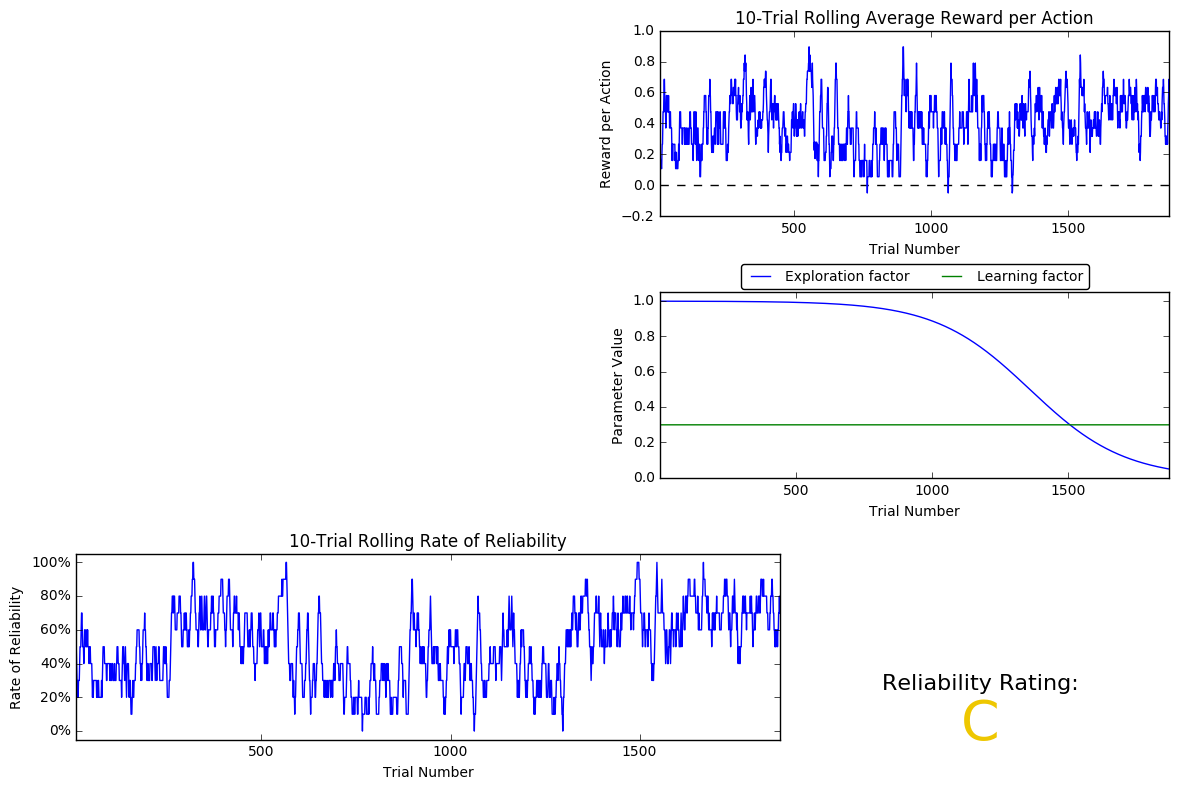

In [49]:
# Load the 'qsim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('qsim_default-learning.csv')

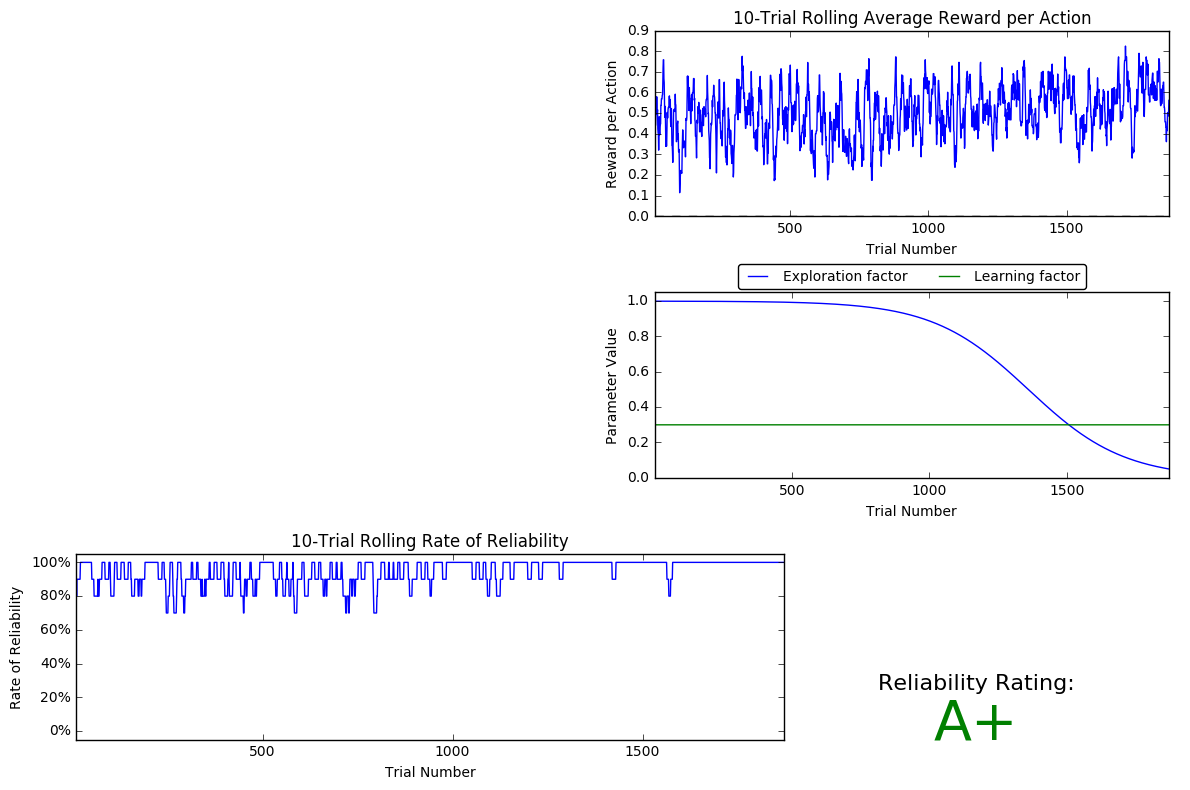

In [50]:
# Load the 'qsim_default-learning' file from the modified q-learning algorithm.
vs.plot_trials('sim_default-learning.csv')

## Analysis
When learning is turned on the POMDPagent performs better than the vanilla q-learner.
The Q-learner learns a policy that does worse than with learning turned off.

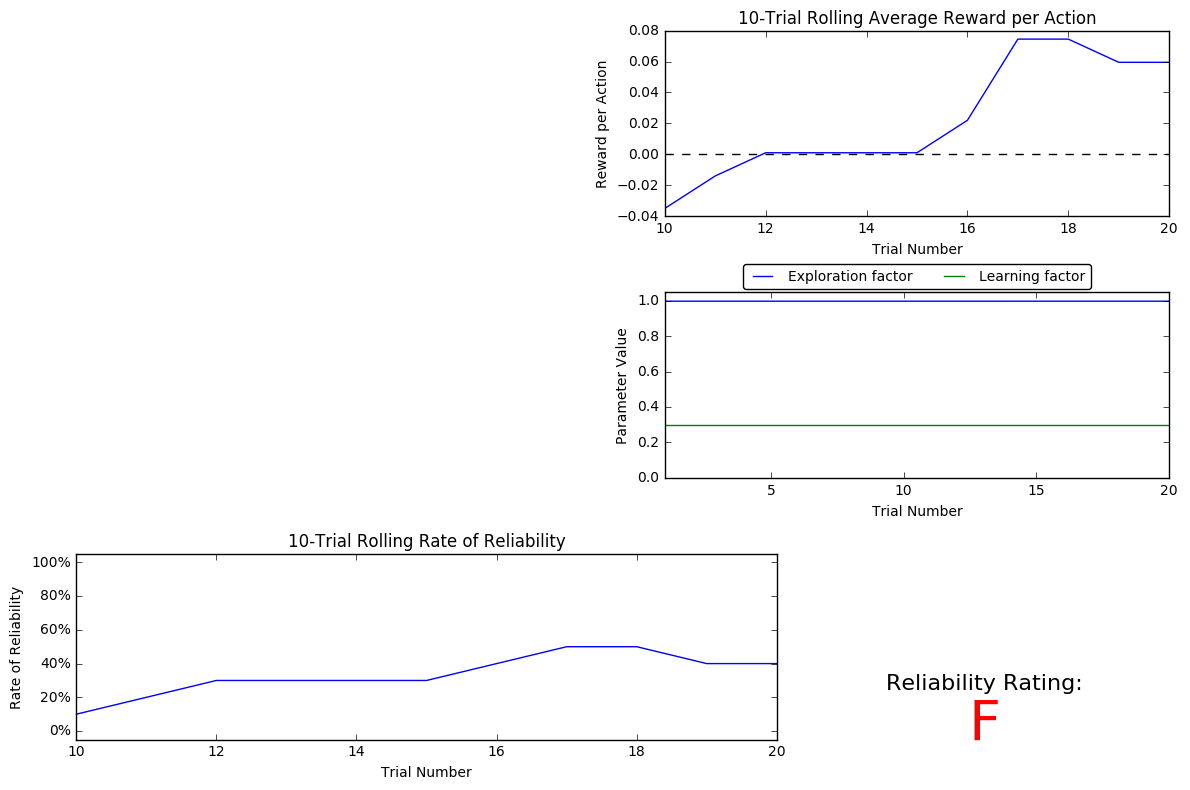

In [51]:
# Load the 'qtiger_sim_no-learning' file from the default Q-Learning simulation
vs.plot_trials('qtiger_sim_no-learning.csv')

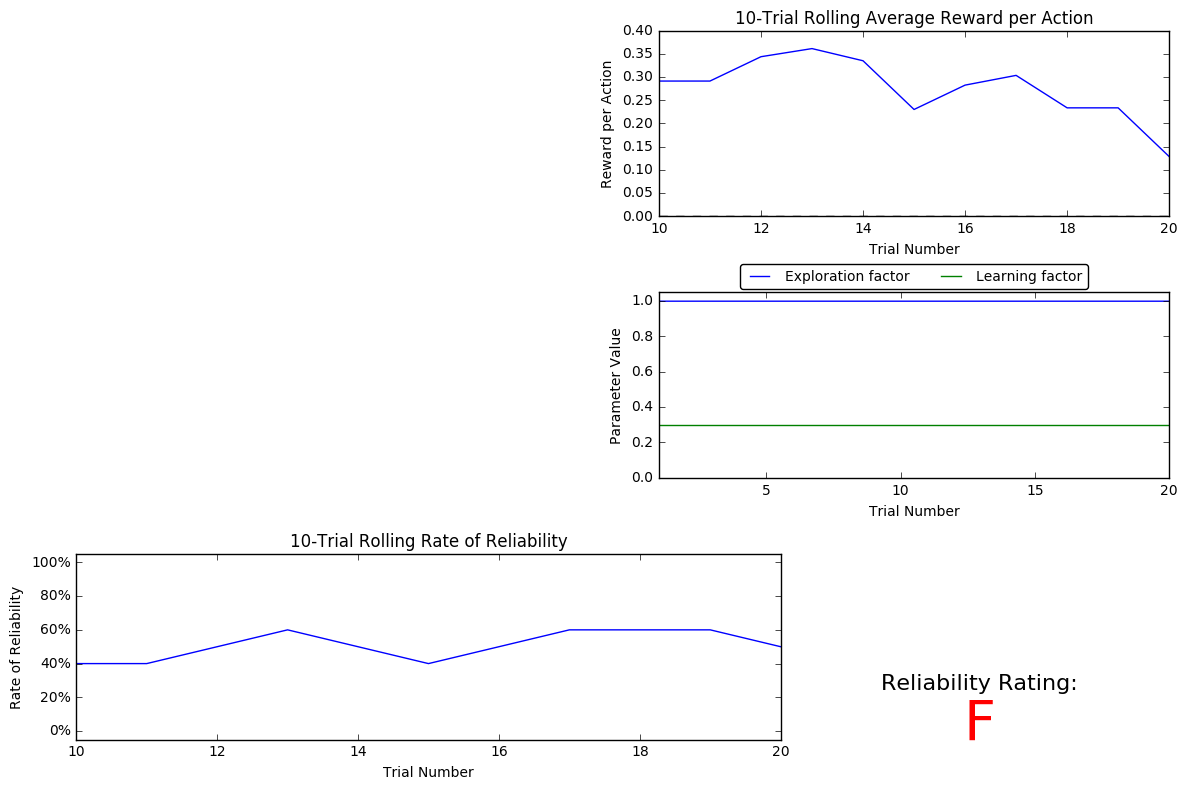

In [52]:
# Load the 'tiger_sim_no-learning' file from the default Q-Learning simulation
vs.plot_trials('tiger_sim_no-learning.csv')

## Analysis
In the case of the modified tiger problem it is too complicated to get more than 50% reliability on random chance.
Both algorithms fail without learning.

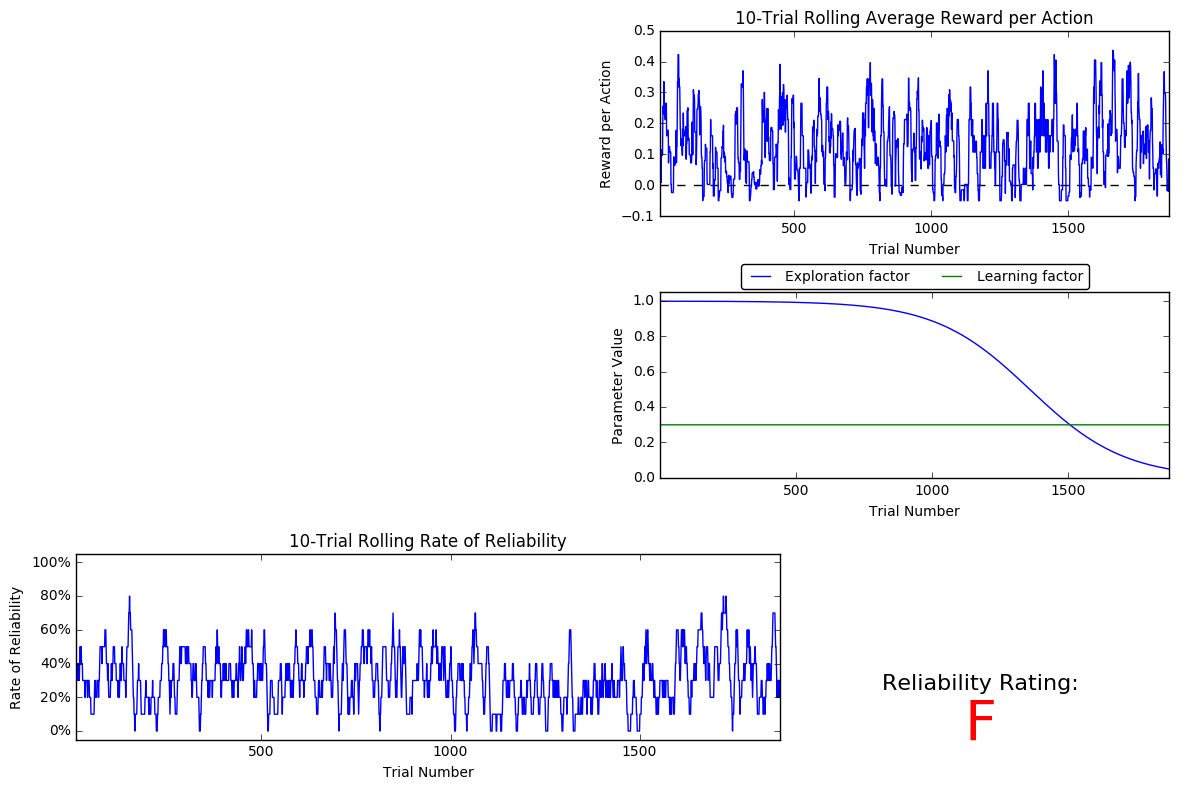

In [53]:
# Load the 'qtiger_sim_no-learning' file from the default Q-Learning simulation
vs.plot_trials('qtiger_sim_default-learning.csv')

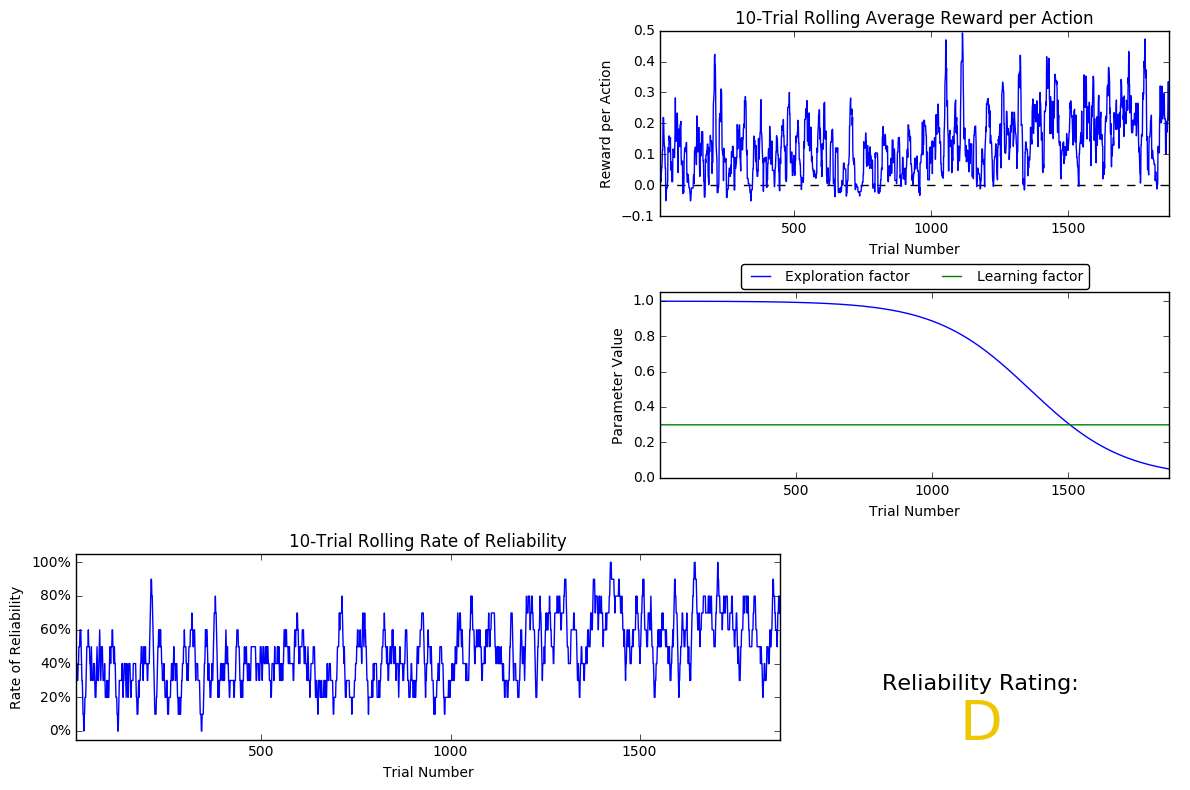

In [54]:
# Load the 'qtiger_sim_no-learning' file from the default Q-Learning simulation
vs.plot_trials('tiger_sim_default-learning.csv')

## Conclusion

The algorithm that I created performs better on these POMDP's than the vanilla q-learner. However it didn't find the optimal strategy which would have at least gotten it a B grade. Ultimately a marginal improvement over the vanilla q-learner. The agent successfully translates a given POMDP and translates it to a MDP that aproximates the POMDP and is solvable by a q-learner. I think some directions I could take to improve it would be to more find a way to more intelligently reduce state space. Some states are never or rarely entered and a few states are so similar to each other that they could be combined into a single state. Finding a way to do this affectively would be a decent improvement over what I have now. A possible approach would be to track belief states and do a k-means clustering of the points in belief states it reaches. The clusters would then be states to optimize a q-learner over.